In [1]:
import pandas as pd

spdata = pd.read_pickle('SP.pkl')
mpdata = pd.read_pickle('MP.pkl')

In [2]:
spdata['label'] = 0
mpdata['label'] = 1

In [3]:
intersection_columns = list(set(spdata.columns).intersection(set(mpdata.columns)))
data = pd.DataFrame()
data = data.append(spdata[intersection_columns].sample(n=8288, random_state=1))
data = data.append(mpdata[mpdata['Record number recode']==1][intersection_columns])
data = data[['label', 'Age at diagnosis', 'Marital status at diagnosis', 'Derived AJCC Stage Group, 7th ed (2010-2015)', 'Derived AJCC T, 7th ed (2010-2015)', 'Derived AJCC N, 7th ed (2010-2015)', 'Derived AJCC M, 7th ed (2010-2015)', 'Grade', 'Breast Subtype (2010+)', 'ER Status Recode Breast Cancer (1990+)', 'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)', 'Chemotherapy recode (yes, no/unk)',  'Radiation sequence with surgery']]

In [4]:
from pycaret.classification import *

In [5]:
clf = setup(data, target='label', Fix Imbalance)

Setup Succesfully Completed!


,Description,Value
0,session_id,5261
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(16576, 14)"
4,Missing Values,True
5,Numeric Features,1
6,Categorical Features,12
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.6157,0.6611,0.6860,0.6015,0.6408,0.2314,0.2339,2.4005
1,Light Gradient Boosting Machine,0.6119,0.6557,0.6863,0.5974,0.6387,0.2238,0.2265,0.3090
2,Logistic Regression,0.6117,0.6576,0.7379,0.5894,0.6551,0.2235,0.2312,0.2297
3,Linear Discriminant Analysis,0.6089,0.6550,0.7416,0.5862,0.6547,0.2178,0.2261,0.2408
4,CatBoost Classifier,0.6088,0.6552,0.6917,0.5932,0.6386,0.2176,0.2209,13.8549
5,Ridge Classifier,0.6085,0.0000,0.7415,0.5858,0.6544,0.2169,0.2252,0.0454
6,Ada Boost Classifier,0.6082,0.6552,0.7086,0.5902,0.6438,0.2164,0.2211,0.9049
7,Extreme Gradient Boosting,0.6017,0.6408,0.6718,0.5890,0.6276,0.2033,0.2055,1.7080
8,Quadratic Discriminant Analysis,0.5732,0.6136,0.8855,0.5467,0.6652,0.1463,0.2213,0.0619
9,K Neighbors Classifier,0.5721,0.6045,0.5967,0.5688,0.5823,0.1442,0.1444,0.2946


In [7]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5797,0.5978,0.9862,0.5442,0.7013,0.1588,0.2731
1,0.5754,0.5962,0.9673,0.5425,0.6951,0.1502,0.2421
2,0.5444,0.6056,0.3690,0.5676,0.4472,0.0884,0.0944
3,0.5716,0.6364,0.9603,0.5403,0.6915,0.1431,0.2276
4,0.5698,0.5972,0.7948,0.5482,0.6488,0.1397,0.1564
5,0.5664,0.6105,0.9724,0.5366,0.6916,0.1328,0.2275
6,0.5836,0.6208,0.9793,0.5467,0.7017,0.1672,0.2736
7,0.5828,0.6191,0.8845,0.5516,0.6795,0.1655,0.2076
8,0.5836,0.6391,0.9638,0.5475,0.6983,0.1672,0.2575
9,0.5750,0.6134,0.9776,0.5415,0.6970,0.1500,0.2529


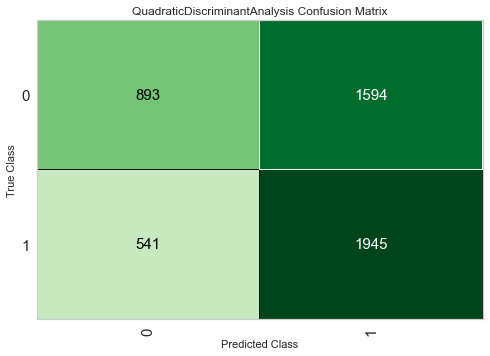

In [10]:
plot_model(qda, 'confusion_matrix')

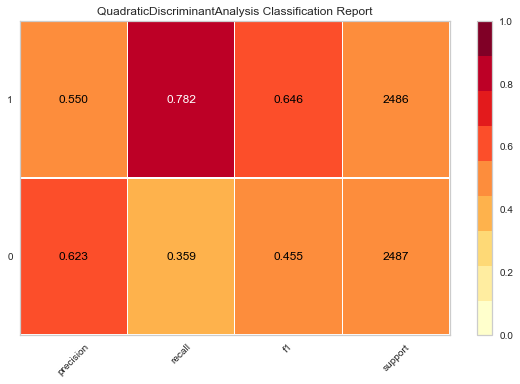

In [14]:
plot_model(qda, 'class_report')